 # ***NAME: PURV PATEL***




## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

### Importing Dataset

In [ ]:
data=pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Graphical Reprsentation of data

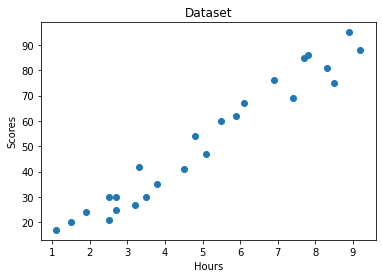

In [ ]:
plt.scatter(data['Hours'],data['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Dataset')
plt.show()

## Model Training

### Dependent and Independent Variables

In [ ]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print(X_train)
print(Y_train)

[[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]
[25 42 47 35 20 27 41 95 75 30 30 24 54 67 86 60 85 17 69 88]


In [ ]:
print(Y_val)
print(X_val)

[81 30 21 76 62]
[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


### Linear Regressor

In [ ]:
from sklearn.linear_model import ElasticNet,LinearRegression
regressor=LinearRegression()
# regressor=ElasticNet(random_state=42)
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Validation

### Graphical Representation of Regression Line

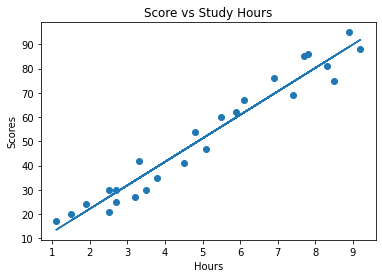

In [ ]:
plt.scatter(X,Y)
plt.plot(X,((regressor.coef_)*X+regressor.intercept_))
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Score vs Study Hours')
plt.show()

### Comparing Predicted Results to Actual Results on Test Set

In [ ]:
Y_pred=regressor.predict(X_val)
# Y_pred=regressor.predict(sc.transform(X_val))
# Y_pred=sc1.inverse_transform(Y_pred)
# Y_pred=np.ravel(Y_pred)
comparision=pd.DataFrame({'Predicted':Y_pred,'Actual':Y_val})
comparision

,Predicted,Actual
0,83.188141,81
1,27.032088,30
2,27.032088,21
3,69.633232,76
4,59.951153,62


### Mean Absolute Error and Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error: '+str(mean_absolute_error(Y_pred,Y_val)))
# print('Accuracy: '+str(regressor.score(sc.transform(X_val),sc1.transform(Y_val.reshape(-1,1)))))
print('Accuracy: '+str(regressor.score(X_val,Y_val)))

Mean Absolute Error: 3.9207511902099244
Accuracy: 0.9678055545167994


## Prediction

In [ ]:
p=regressor.predict([[9.25]])
print('A person studying 9.25 hours a day will score {score:.2f}.'.format(score=p[0]))

A person studying 9.25 hours a day will score 93.97
